## We evaluate the trained model which used Random Forest algorithm

In [1]:
#Import all required modules

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

### The file to be read was prepared by Divya. Remove Arrest column from evaluation data since we will be prediction Arrests

In [2]:
# get data from truncated chicago crime 500 rows data file

df_predict = pd.read_csv("./Crime_last500.csv")

#Confirm the number of Rows

print(df_predict.shape)

(500, 29)


In [3]:
#Define a new column "Month" because we also want to include month of the year and convert it to "numeric"

df_predict['Month'] = pd.DatetimeIndex(df_predict['Date']).month

df_predict.head()

,ID,Date,IUCR,CrimeType,LocationDescription,Arrest,Domestic,Ward,CommunityArea,FBICode,...,PoliceBeats,OnlyDate,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis,Month
0,11859143,10/12/2019 23:58,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6,67,14,...,216,10/12/2019,11:58:00 PM,23:58:00,23,-2.450000e-16,1.0,1168528,1858699,10
1,11859039,10/12/2019 23:57,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28,26,18,...,82,10/12/2019,11:57:00 PM,23:57:00,23,-2.450000e-16,1.0,1150216,1899724,10
2,11859098,10/12/2019 23:55,454,BATTERY,STREET,0,0,24,29,08B,...,153,10/12/2019,11:55:00 PM,23:55:00,23,-2.450000e-16,1.0,1153327,1890804,10
3,11859480,10/12/2019 23:49,820,THEFT,RESIDENTIAL YARD (FRONT/BACK),0,0,32,22,6,...,192,10/12/2019,11:49:00 PM,23:49:00,23,-2.450000e-16,1.0,1161813,1912993,10
4,11859057,10/12/2019 23:47,1320,CRIMINAL DAMAGE,GAS STATION,1,0,8,48,14,...,246,10/12/2019,11:47:00 PM,23:47:00,23,-2.450000e-16,1.0,1188500,1842375,10


In [4]:
#Add sin_month and cos_month
months_in_year=12
df_predict['sin_month']=np.sin(2*np.pi*df_predict.Month/months_in_year)
df_predict['cos_month']=np.cos(2*np.pi*df_predict.Month/months_in_year)
df_predict.head()

,ID,Date,IUCR,CrimeType,LocationDescription,Arrest,Domestic,Ward,CommunityArea,FBICode,...,Time,time_hour,hourofday,sin_time,cos_time,XAxis,YAxis,Month,sin_month,cos_month
0,11859143,10/12/2019 23:58,1310,CRIMINAL DAMAGE,APARTMENT,0,0,6,67,14,...,11:58:00 PM,23:58:00,23,-2.450000e-16,1.0,1168528,1858699,10,-0.866025,0.5
1,11859039,10/12/2019 23:57,2092,NARCOTICS,PARKING LOT/GARAGE(NON.RESID.),1,0,28,26,18,...,11:57:00 PM,23:57:00,23,-2.450000e-16,1.0,1150216,1899724,10,-0.866025,0.5
2,11859098,10/12/2019 23:55,454,BATTERY,STREET,0,0,24,29,08B,...,11:55:00 PM,23:55:00,23,-2.450000e-16,1.0,1153327,1890804,10,-0.866025,0.5
3,11859480,10/12/2019 23:49,820,THEFT,RESIDENTIAL YARD (FRONT/BACK),0,0,32,22,6,...,11:49:00 PM,23:49:00,23,-2.450000e-16,1.0,1161813,1912993,10,-0.866025,0.5
4,11859057,10/12/2019 23:47,1320,CRIMINAL DAMAGE,GAS STATION,1,0,8,48,14,...,11:47:00 PM,23:47:00,23,-2.450000e-16,1.0,1188500,1842375,10,-0.866025,0.5


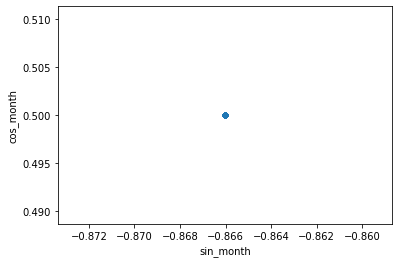

In [5]:
#Plot the sin_month-cos_month scatter plot

df_predict.sample(100).plot.scatter('sin_month','cos_month')

In [6]:
#Define a dataframe containing only the columns we need for testing

df_predict_arrest = pd.DataFrame([ df_predict.IUCR, df_predict.CommunityArea, df_predict.PoliceBeats, df_predict.sin_time ,df_predict.cos_time, df_predict.sin_month, df_predict.cos_month]).transpose()

In [7]:
#Print the header - top 10 records

df_predict_arrest.head(10)

,IUCR,CommunityArea,PoliceBeats,sin_time,cos_time,sin_month,cos_month
0,1310.0,67.0,216.0,-2.450000e-16,1.0,-0.866025,0.5
1,2092.0,26.0,82.0,-2.450000e-16,1.0,-0.866025,0.5
2,454.0,29.0,153.0,-2.450000e-16,1.0,-0.866025,0.5
3,820.0,22.0,192.0,-2.450000e-16,1.0,-0.866025,0.5
4,1320.0,48.0,246.0,-2.450000e-16,1.0,-0.866025,0.5
5,860.0,58.0,115.0,-2.450000e-16,1.0,-0.866025,0.5
6,1822.0,23.0,66.0,-2.450000e-16,1.0,-0.866025,0.5
7,1360.0,63.0,120.0,-2.450000e-16,1.0,-0.866025,0.5
8,502.0,68.0,203.0,-2.450000e-16,1.0,-0.866025,0.5
9,460.0,8.0,74.0,-2.450000e-16,1.0,-0.866025,0.5


## Load the saved model

In [8]:
#The model was created in the file "machine_learning_module_RF_Ramesh_Final.ipynb"

from sklearn.externals import joblib
lr_cv_model = joblib.load("./chicago-crime-trained-model-RF-Ramesh.pkl")

C:\Users\rames\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
#Define the independent variables

X_predict = df_predict_arrest


In [10]:
#Predict Arrest (1) or No Arrest (0) for the test data set

lr_cv_model.predict(X_predict)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [11]:
# Add a column Arrest_Predicted and populate it with values listed above

df_predict_arrest['Arrest_Predicted']=lr_cv_model.predict(X_predict)

In [12]:
#Print the header with top 2 Rows

df_predict_arrest.head(2)

,IUCR,CommunityArea,PoliceBeats,sin_time,cos_time,sin_month,cos_month,Arrest_Predicted
0,1310.0,67.0,216.0,-2.450000e-16,1.0,-0.866025,0.5,0
1,2092.0,26.0,82.0,-2.450000e-16,1.0,-0.866025,0.5,1


In [13]:
#Add a column "Actual_Arrest" and populate with values from test data set

df_predict_arrest['Actual_Arrest'] = pd.DataFrame([df_predict.Arrest]).transpose()

In [14]:
#Print the top 20 Rows to eyeball a comparison with "predicted" and "actual" Arrest values

df_predict_arrest.head(20)

,IUCR,CommunityArea,PoliceBeats,sin_time,cos_time,sin_month,cos_month,Arrest_Predicted,Actual_Arrest
0,1310.0,67.0,216.0,-2.450000e-16,1.0,-0.866025,0.5,0,0
1,2092.0,26.0,82.0,-2.450000e-16,1.0,-0.866025,0.5,1,1
2,454.0,29.0,153.0,-2.450000e-16,1.0,-0.866025,0.5,1,0
3,820.0,22.0,192.0,-2.450000e-16,1.0,-0.866025,0.5,0,0
4,1320.0,48.0,246.0,-2.450000e-16,1.0,-0.866025,0.5,0,1
5,860.0,58.0,115.0,-2.450000e-16,1.0,-0.866025,0.5,0,0
6,1822.0,23.0,66.0,-2.450000e-16,1.0,-0.866025,0.5,1,1
7,1360.0,63.0,120.0,-2.450000e-16,1.0,-0.866025,0.5,0,1
8,502.0,68.0,203.0,-2.450000e-16,1.0,-0.866025,0.5,1,0
9,460.0,8.0,74.0,-2.450000e-16,1.0,-0.866025,0.5,0,1


In [15]:
#Export the above data frame to a csv file

export_csv = df_predict_arrest.to_csv (r'df_predict_arrest_RF.csv', index = None, header=True)

In [16]:
#Add a column "resultmatch?" and show TRUE or FALSE based on whether Actual and Predicted values have matched

import numpy as np
df_predict_arrest['resultmatch?'] = np.where(df_predict_arrest.Arrest_Predicted == df_predict_arrest.Actual_Arrest, 'True', 'False')  

In [17]:
#Print the top 20 Rows to eyeball a comparison with "predicted" and "actual" Arrest values

df_predict_arrest.head(20)

,IUCR,CommunityArea,PoliceBeats,sin_time,cos_time,sin_month,cos_month,Arrest_Predicted,Actual_Arrest,resultmatch?
0,1310.0,67.0,216.0,-2.450000e-16,1.0,-0.866025,0.5,0,0,True
1,2092.0,26.0,82.0,-2.450000e-16,1.0,-0.866025,0.5,1,1,True
2,454.0,29.0,153.0,-2.450000e-16,1.0,-0.866025,0.5,1,0,False
3,820.0,22.0,192.0,-2.450000e-16,1.0,-0.866025,0.5,0,0,True
4,1320.0,48.0,246.0,-2.450000e-16,1.0,-0.866025,0.5,0,1,False
5,860.0,58.0,115.0,-2.450000e-16,1.0,-0.866025,0.5,0,0,True
6,1822.0,23.0,66.0,-2.450000e-16,1.0,-0.866025,0.5,1,1,True
7,1360.0,63.0,120.0,-2.450000e-16,1.0,-0.866025,0.5,0,1,False
8,502.0,68.0,203.0,-2.450000e-16,1.0,-0.866025,0.5,1,0,False
9,460.0,8.0,74.0,-2.450000e-16,1.0,-0.866025,0.5,0,1,False


In [18]:
#Get a count of "resultmatch?" to show how many values matched

df_predict_arrest['resultmatch?'].value_counts()

True     437
False     63
Name: resultmatch?, dtype: int64

In [19]:
#Calculate the accuracy achieved by the model

print("{0:0.2f}% Accuracy achieved by the Random Forest model".format(437/len(df_predict_arrest.index) * 100))

87.40% Accuracy achieved by the Random Forest model
